# $k$-Moyennes

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.random import uniform as rand

## Chargement d'un jeux de données

Utilisation des jeux de données disponibles sous Scikit-Learn :
https://scikit-learn.org/stable/datasets/index.html

Choisissez un des jeux de données, e.g. 
    
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Visualisation
    plt.figure()
    plt.scatter(X[:,0], y[:,0], s=7, c=y)
    plt.show

[[2.012194948967995, 7.54565024091749, 3.723594330618831, 6.376895539757801], [2.7446626235057736, 0.6367116932556842, 5.521382384128281, 7.730140085657629], [3.704767919283923, 0.885408303450134, 1.2132058803129182, 5.370024033393147]]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<function matplotlib.pyplot.show(*args, **kw)>

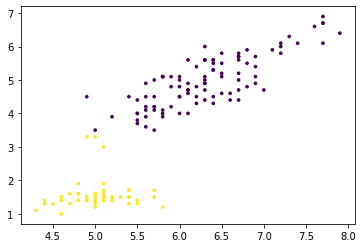

In [85]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

def k_means(nbClusters,dataset):
    ITE_MAX = 2000
    nbIt = 0
    centroides = []
    maxVal = max(np.max(dataset.data, axis=0))
    minVal = min(np.min(dataset.data, axis=0))
    rd = dataset.data.shape[1]
    for i in range(nbClusters):
        centroide = []
        for j in range(rd):
            centroide.append(rand(minVal,maxVal))
        centroides.append(centroide)
    print(centroides)
    new_centroides = centroides.copy()
    target = initDataset(dataset.data)
    target = assignCentroides(dataset.data,new_centroides,target)
    new_centroides = computeCentroides(dataset.data,centroides,target,rd)
    while(compareCentroides(centroides,new_centroides) == False and nbIt < ITE_MAX):
        nbIt += 1
        target = assignCentroides(dataset.data,new_centroides,target)
        new_centroides = computeCentroides(dataset.data,centroides,target,rd)
    print(target)
    return target
        
def computeCentroides(data,centroides,target,rd):
    ret = centroides.copy()
    for i in range(len(centroides)):
        new_centroides = np.zeros(rd)
        nb_points = 0
        for j in range(len(data)):
            if target[j] == i:
                nb_points += 1
                new_centroides = np.add(new_centroides,data[j])
        new_centroides /= nb_points
        ret[i] = new_centroides
    return ret
def assignCentroides(data,centroides,target):
    ret = target.copy()
    for i in range(len(data)):
        best_choice = 0
        distance = 1000
        for j in range(len(centroides)):
            new_dist = distance_between(data[i],centroides[j]) 
            if new_dist < distance:
                distance = new_dist
                best_choice = j
        ret[i] = best_choice
    return ret
                
def distance_between(t1,t2):
    ret = 0
    for i in range(len(t1)):
        ret += np.power(t1[i] - t2[i],2)
    return np.sqrt(ret)
    
def initDataset(dataset):
    ret = []
    for i in range(len(dataset)):
        ret.append(-1)
    return ret
def compareCentroides(c1,c2):
    ret = True
    hasBreak = False
    for i in range(len(c1)):
        for j in range(len(c1[i])):    
            if c1[i][j] != c2[i][j]:
                ret = False
                hasBreak = True
                break
        if hasBreak:
            break
    return ret
target = k_means(3,iris)

# Visualisation
plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=target)
plt.show